In [581]:
import pandas as pd
import numpy as np

This is our database!

In [582]:
!wget http://www.lawrence.edu/fast/greggj/CMSC490/diabetes.csv
df = pd.read_csv('diabetes.csv')
df.head()

URL transformed to HTTPS due to an HSTS policy
--2023-09-27 00:24:04--  https://www.lawrence.edu/fast/greggj/CMSC490/diabetes.csv
Resolving www.lawrence.edu (www.lawrence.edu)... 143.44.124.14
Connecting to www.lawrence.edu (www.lawrence.edu)|143.44.124.14|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www7.lawrence.edu/fast/greggj/CMSC490/diabetes.csv [following]
--2023-09-27 00:24:05--  https://www7.lawrence.edu/fast/greggj/CMSC490/diabetes.csv
Resolving www7.lawrence.edu (www7.lawrence.edu)... 143.44.124.14
Connecting to www7.lawrence.edu (www7.lawrence.edu)|143.44.124.14|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www2.lawrence.edu/fast/greggj/CMSC490/diabetes.csv [following]
--2023-09-27 00:24:05--  https://www2.lawrence.edu/fast/greggj/CMSC490/diabetes.csv
Resolving www2.lawrence.edu (www2.lawrence.edu)... 143.44.124.14
Connecting to www2.lawrence.edu (www2.lawrence.edu)|143.44.124.14|:

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,40,Male,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,Male,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,Male,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,Male,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,Male,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


First, we will reformat the 'gender' column with 1s for 'female's and 0s for 'male's and normalize the 'age' column.

In [583]:
df["gender"] = np.where(df["gender"] == "female", 1, 0)
df['age'] = (df['age'] - df['age'].mean())/df['age'].std()
df.head()

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,-0.660731,0,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,0.820572,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,-0.578436,0,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,-0.249258,0,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,0.985161,0,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


Next, we will get out train and test sets:

In [584]:
input = df.drop(['class'],axis=1).to_numpy()
output = df['class'].to_numpy()
print(input.shape)
train_data = input[:416,:]
train_targets = output[:416] 
test_data = input[416:,:]
test_targets = output[416:] 

(520, 16)


And finally, our model!

In [585]:
from keras import models
from keras import layers

def build_model():
    model = models.Sequential([
        layers.BatchNormalization(),
        layers.Dense(16, activation="relu"),
        layers.Dense(16, activation="relu"),
        layers.Dense(1, activation="sigmoid")
    ])
    model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
    return model

In [586]:
model = build_model()
history = model.fit(train_data, train_targets,
              epochs=19, batch_size=16, validation_data=(test_data, test_targets)) 

Epoch 1/19


26/26 [==============================] - 1s 4ms/step - loss: 0.6571 - accuracy: 0.6683 - val_loss: 0.6661 - val_accuracy: 0.5385
Epoch 2/19
26/26 [==============================] - 0s 1ms/step - loss: 0.5751 - accuracy: 0.7356 - val_loss: 0.6185 - val_accuracy: 0.6154
Epoch 3/19
26/26 [==============================] - 0s 1ms/step - loss: 0.5137 - accuracy: 0.7740 - val_loss: 0.5691 - val_accuracy: 0.6827
Epoch 4/19
26/26 [==============================] - 0s 2ms/step - loss: 0.4516 - accuracy: 0.7981 - val_loss: 0.5154 - val_accuracy: 0.7115
Epoch 5/19
26/26 [==============================] - 0s 2ms/step - loss: 0.4072 - accuracy: 0.8245 - val_loss: 0.4639 - val_accuracy: 0.7404
Epoch 6/19
26/26 [==============================] - 0s 2ms/step - loss: 0.3875 - accuracy: 0.8341 - val_loss: 0.4166 - val_accuracy: 0.7981
Epoch 7/19
26/26 [==============================] - 0s 1ms/step - loss: 0.3607 - accuracy: 0.8293 - val_loss: 0.3738 - val_accuracy: 0.8173
Epoch 8/19
26/26 [=============

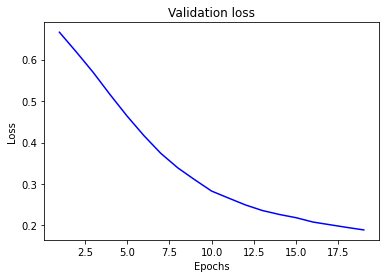

In [587]:
import matplotlib.pyplot as plt
val_loss = history.history["val_loss"]
epochs = range(1, len(val_loss) + 1)
plt.title("Validation loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

It seems that the loss would go lower relatively slowly pass the 19th epoch. Through trial and error, I found that in many cases, the loss even increased from the 19th to the 20th epoch, so I decided to stop at 19.

Now, we may try to make some predictions to assess our model. We will look at the predictions for the first 11 rows of our test set:

In [588]:
predictions = model(test_data)
prearr = predictions - test_targets.reshape(104,1)
prearr[:11,]

<tf.Tensor: shape=(11, 1), dtype=float32, numpy=
array([[-1.4020801e-03],
       [-1.1610985e-04],
       [-6.4794421e-03],
       [-1.6331077e-03],
       [-3.3579838e-01],
       [-5.1405370e-02],
       [-8.4092498e-02],
       [-2.4122596e-02],
       [-2.3916960e-03],
       [-3.2700300e-03],
       [-1.9766092e-03]], dtype=float32)>

We will look at the values of these same rows in our original data set:

In [592]:
df.iloc[104:115,16]

104    1
105    1
106    1
107    1
108    1
109    1
110    1
111    1
112    1
113    1
114    1
Name: class, dtype: int64

It seems that the predictions are quite close!

In [21]:
np.sqrt(history.history["val_loss"][-1])

0.4369517876645348